# Python with Finance Data

### Everyone wants to be rich! Let's see if we can analyze some of the best data in the world - realtime stock data with Python 

In [29]:
# This is new - pandas_datareader allows us to get realtime data (sorta) from various online websites
# Yahoo finance, bloomberg, etc.

from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [12]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
ticker = 'TSLA'

# We would like all available data from 01/01/2010 until today
start_date = '2010-01-01'

# adjusts the time using a datetime library in the YYYY-MM-DD format
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
df = data.DataReader('TSLA', 'yahoo', start_date, end_date)

# if df.head gets the first 5 rows, what will df.tail do?
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-26,313.890015,301.109985,301.910004,309.579987,7843200,309.579987
2018-09-27,314.959991,306.910004,312.899994,307.519989,8509100,307.519989
2018-09-28,278.000000,260.559998,270.260010,264.769989,33649700,264.769989
2018-10-01,311.440002,301.049988,305.769989,310.700012,21777600,310.700012
2018-10-02,316.839996,299.149994,313.950012,301.019989,11709900,301.019989


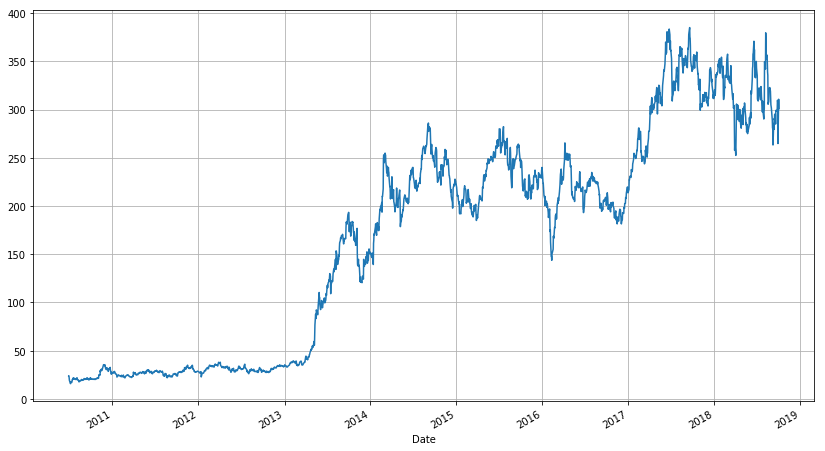

In [57]:
df['Close'].plot(grid=True, figsize=(14, 8))


In [33]:
# Assign `Adj Close` to `daily_close`
daily_close = df[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

            Adj Close
Date                 
2010-06-29   0.000000
2010-06-30  -0.002511
2010-07-01  -0.078473
2010-07-02  -0.125683
2010-07-06  -0.160938
2010-07-07  -0.019243
2010-07-08   0.105063
2010-07-09  -0.003436
2010-07-12  -0.020115
2010-07-13   0.063930
2010-07-14   0.093716
2010-07-15   0.002520
2010-07-16   0.037707
2010-07-19   0.061531
2010-07-20  -0.073482
2010-07-21  -0.003941
2010-07-22   0.038576
2010-07-23   0.013810
2010-07-26  -0.015970
2010-07-27  -0.019093
2010-07-28   0.008273
2010-07-29  -0.017857
2010-07-30  -0.020147
2010-08-02   0.049147
2010-08-03   0.049235
2010-08-04  -0.031435
2010-08-05  -0.038100
2010-08-06  -0.042054
2010-08-09   0.000510
2010-08-10  -0.029082
...               ...
2018-08-21   0.043639
2018-08-22  -0.000808
2018-08-23  -0.004788
2018-08-24   0.008497
2018-08-27  -0.010997
2018-08-28  -0.023209
2018-08-29  -0.021965
2018-08-30  -0.006098
2018-08-31  -0.004915
2018-09-04  -0.042133
2018-09-05  -0.028413
2018-09-06   0.000748
2018-09-07

### This is how to get the rolling mean 

What is a rolling mean? 
- Rolling means (or moving averages) are used to smooth out short-term fluctuations in data
- highlight long-term trends
- **used to gauge the direction of the current trend**

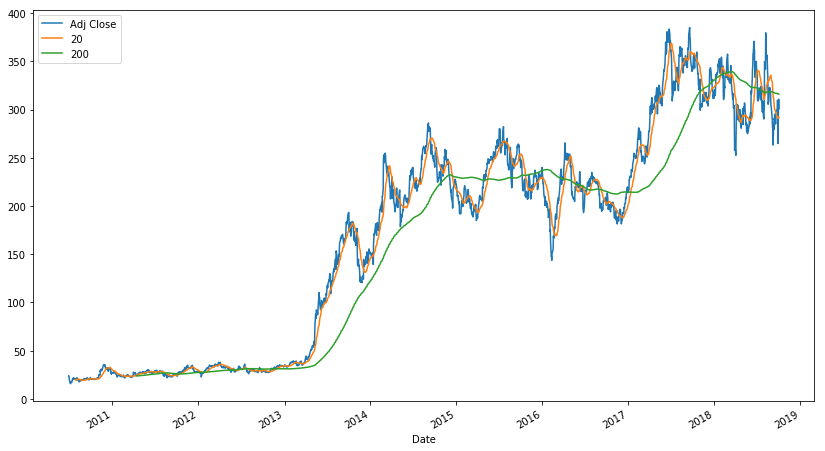

In [56]:
adj_close_px = df['Adj Close']

moving_avg = adj_close_px.rolling(window=40).mean()


df['20'] = adj_close_px.rolling(window=20).mean()

# 252 day rolling mean
df['200'] = adj_close_px.rolling(window=200).mean()

df[['Adj Close', '20', '200']].plot(figsize=(14, 8))

plt.show()


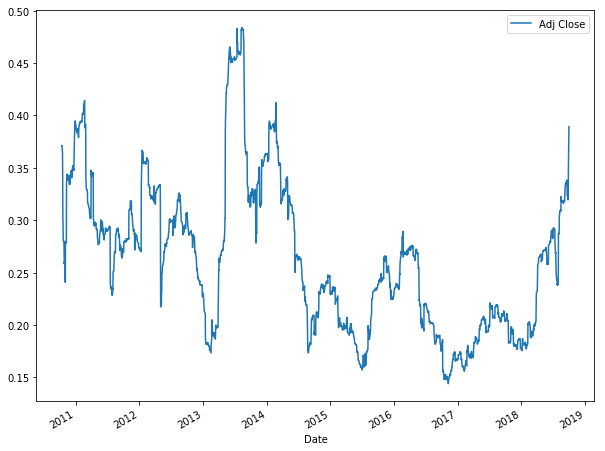

In [47]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()